# Objective for Part 3

In this part, we will focus on data visualization based on the steps:
- Perform EDA on cleaned data. Data is converted into time series for resampling before visualization.
- Perform further cleaning after EDA as some sectors have no taxi available and therefore can be dropped.


In [1]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Read your CSV as DateTime and make sure the dates are parsed
df = pd.read_csv('taxi2.csv', index_col=0, parse_dates=True )

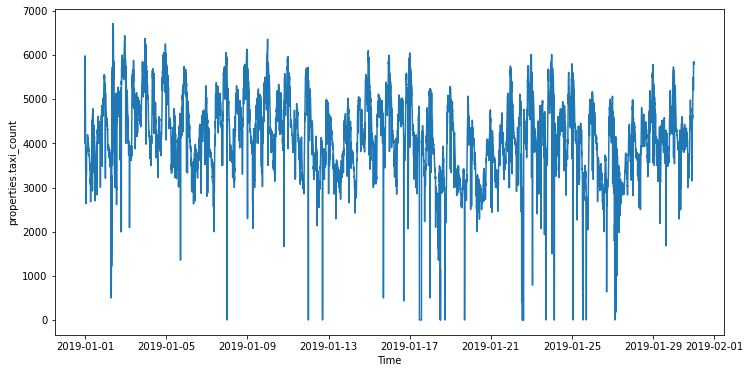

In [3]:
# Step 3: Plot properties.taxi_count vs time
plt.figure(figsize=(12,6))

sns.lineplot(data=df['properties.taxi_count'])
plt.xlabel("Time")
plt.ylabel("properties.taxi_count")
plt.show()

In [4]:
# Step 4: Get the slice where there is no taxi counts
df[df['properties.taxi_count'] == 0]


,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2019-01-08 00:10:00,0,1,10,0,0,0,0,0,0,0,0,0,0
2019-01-12 00:10:00,0,5,10,0,0,0,0,0,0,0,0,0,0
2019-01-12 16:55:00,0,5,55,16,0,0,0,0,0,0,0,0,0
2019-01-17 11:25:00,0,3,25,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:30:00,0,3,30,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:35:00,0,3,35,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:40:00,0,3,40,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:45:00,0,3,45,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:50:00,0,3,50,11,0,0,0,0,0,0,0,0,0


In [5]:
# Step 5: Remove rows where properties.taxi_count is 0
df.drop(df[df['properties.taxi_count'] == 0].index, inplace = True)

In [6]:
# Step 6: Resample your DataFrame by day, and take the day's median value
df_daily = df.resample('D').median()

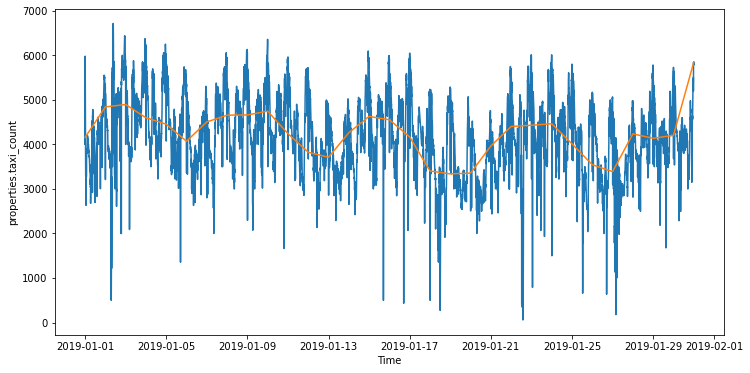

In [7]:
# Step 7: Plot resampled DataFrame over original plot
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df['properties.taxi_count'])
sns.lineplot(data=df_daily['properties.taxi_count'], ax=ax)
plt.xlabel("Time")
plt.ylabel("properties.taxi_count")

plt.show()

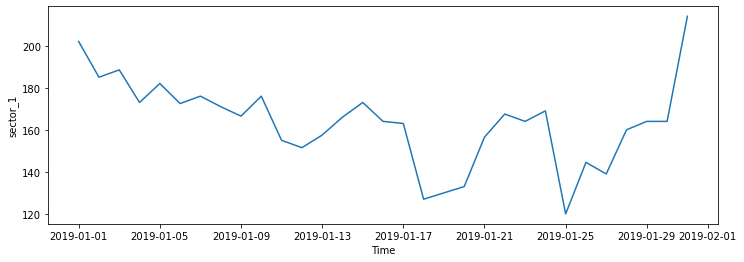

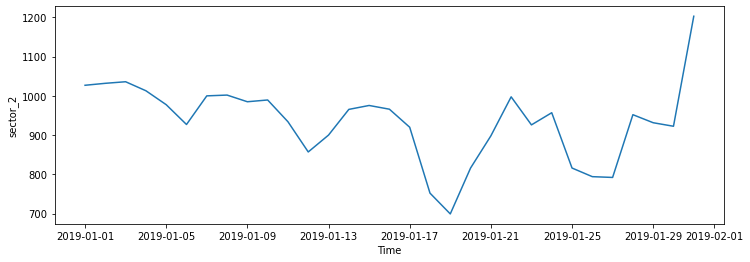

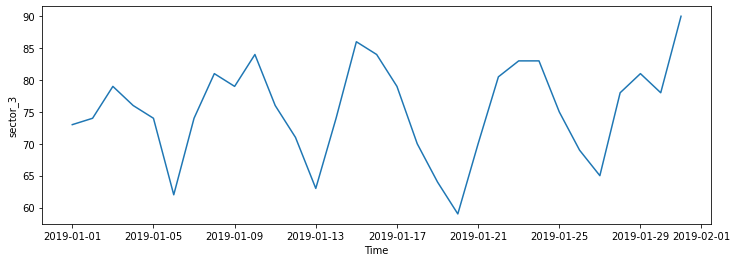

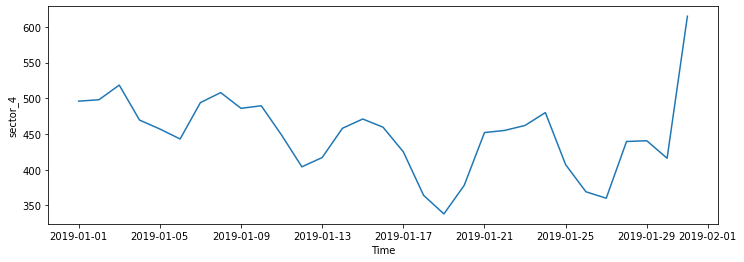

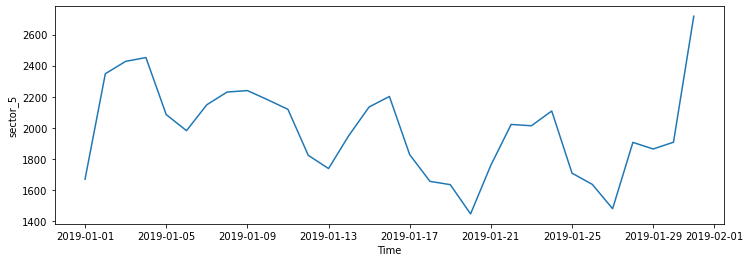

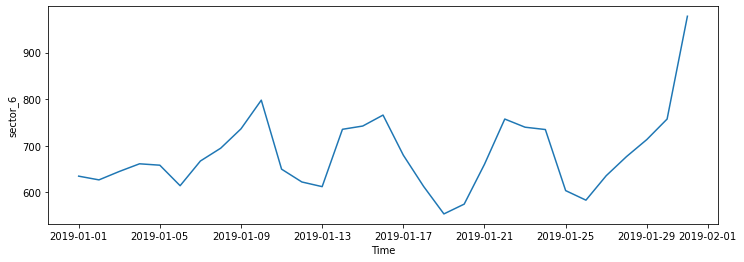

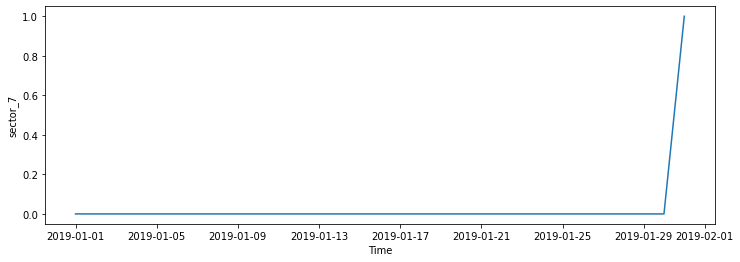

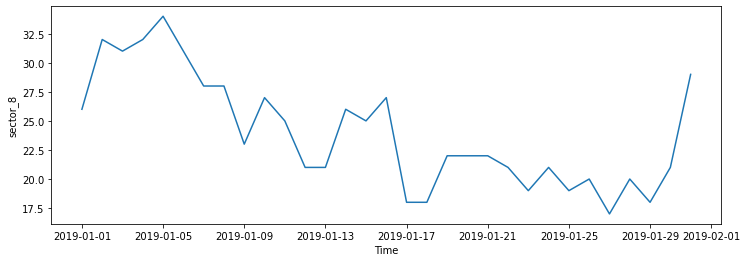

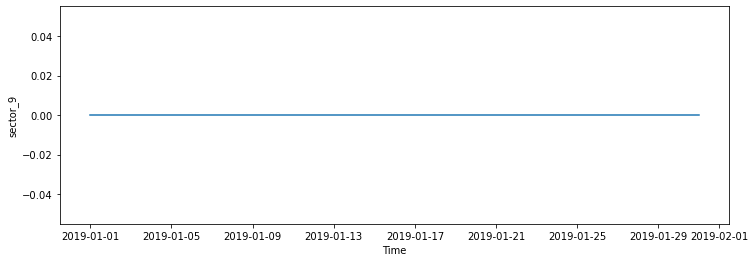

In [8]:
# [Optional] Do the same analysis for sectors 1-9
def plot_sectors(sector):
    plt.figure(figsize=(12,4))
    sns.lineplot(data=df_daily[sector])
    plt.xlabel("Time")
    plt.ylabel(sector)
    plt.show()

sectors = df_daily.columns[-9:].tolist()
for sector in sectors:
    plot_sectors(sector)

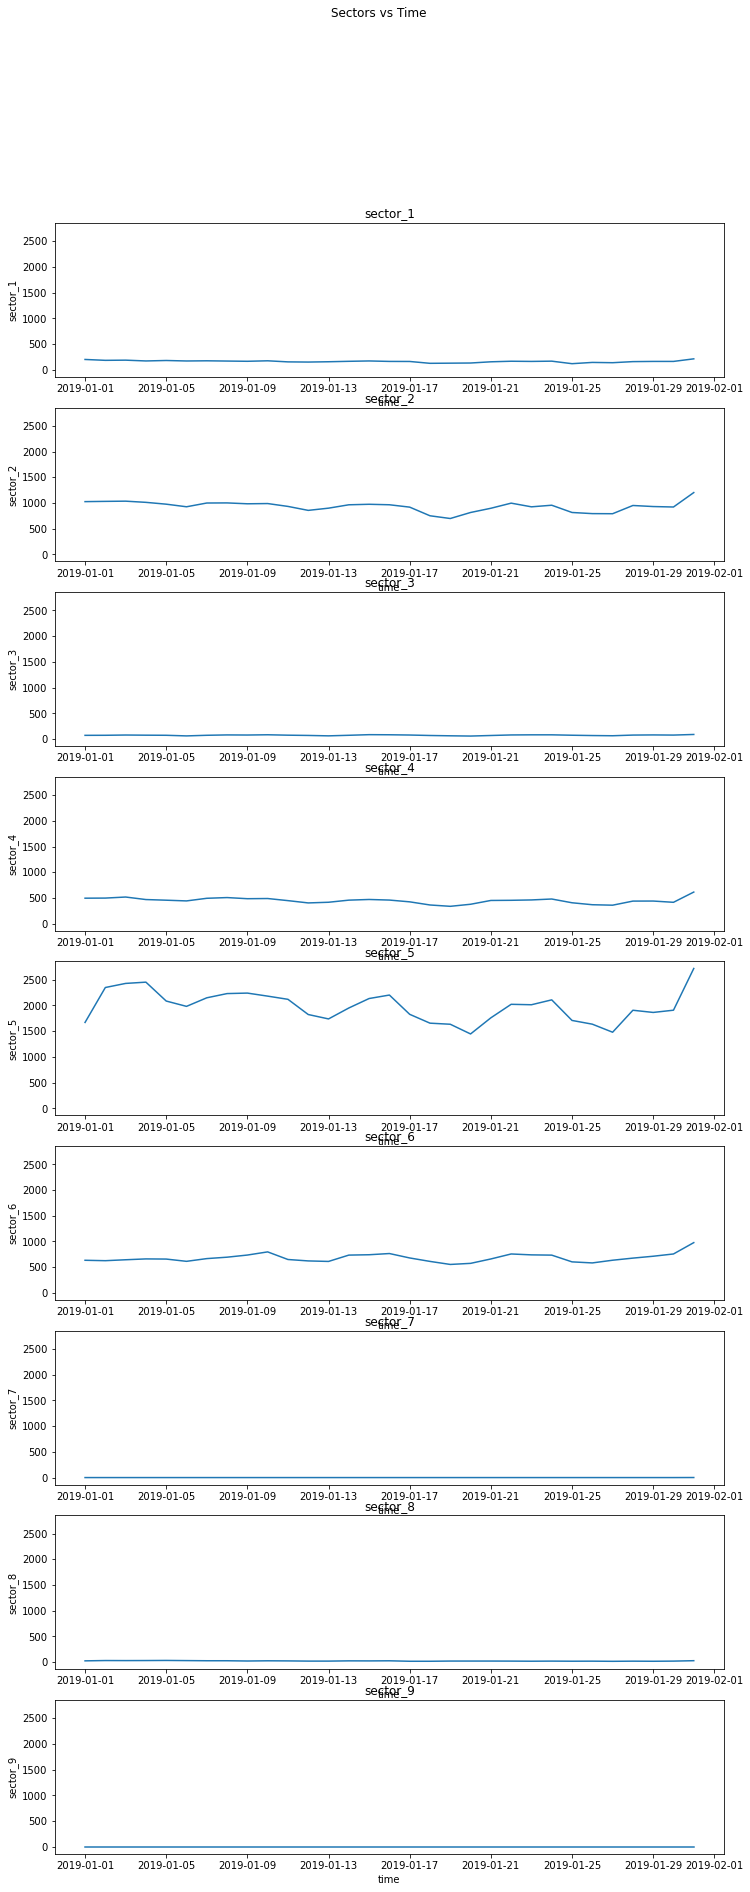

In [13]:
# [Optional] Do the same analysis for sectors 1-9
fig, axes = plt.subplots(9, 1, figsize=(12, 30), sharey=True)
fig.suptitle('Sectors vs Time')

def subplot_sectors(i, sector,):
    sns.lineplot(ax=axes[i], x=df_daily.index, y=df_daily[sector])
    axes[i].set_title(sector)

sectors = df_daily.columns[-9:].tolist()
i = 0
for sector in sectors:
    subplot_sectors(i, sector)
    i += 1


In [14]:
# Step 10: Get the DataFrame containing the hourly average
df_hourly = df.groupby(['hour']).mean()

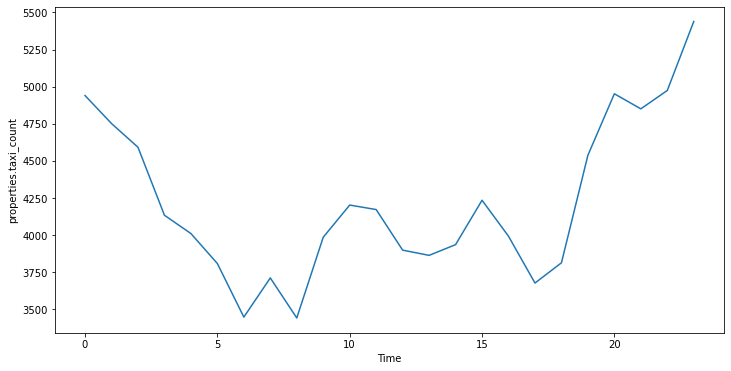

In [15]:
# Step 11: Plot the hourly average of 'properties.taxi_count'
plt.figure(figsize=(12,6))

sns.lineplot(data=df_hourly['properties.taxi_count'])
plt.xlabel("Time")
plt.ylabel("properties.taxi_count")

plt.show()

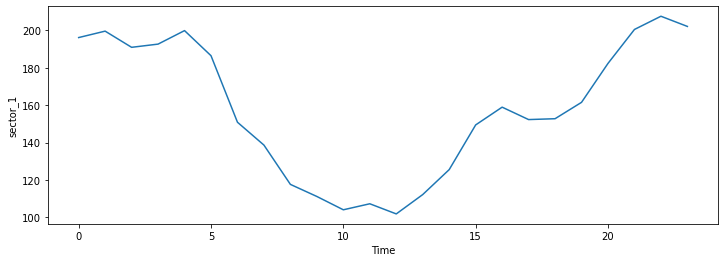

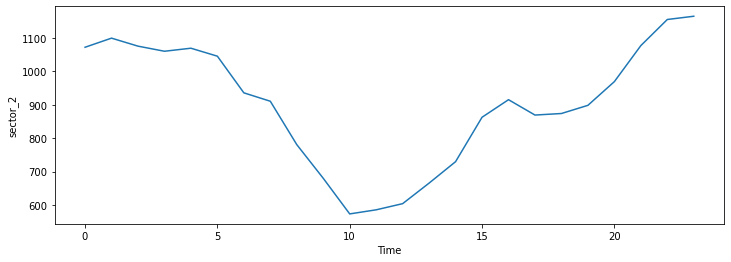

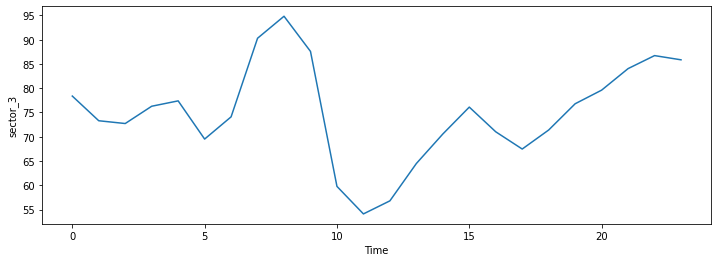

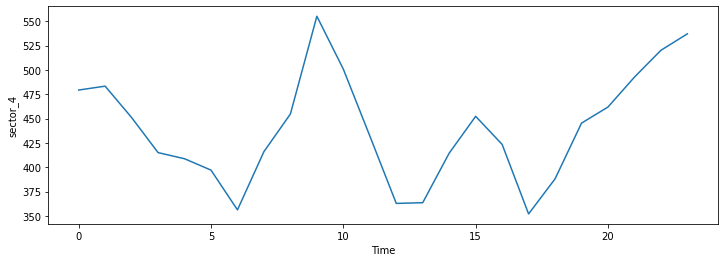

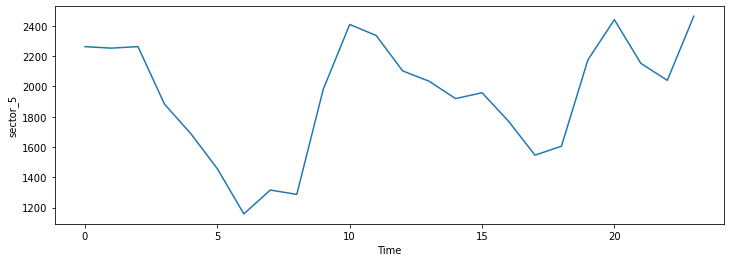

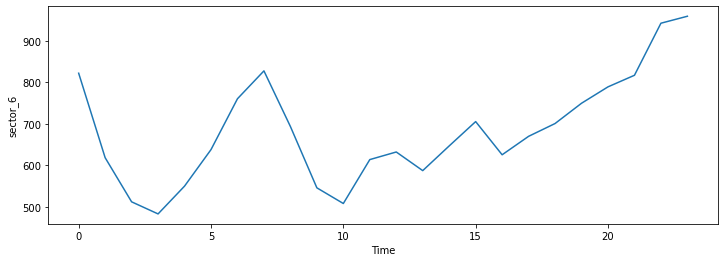

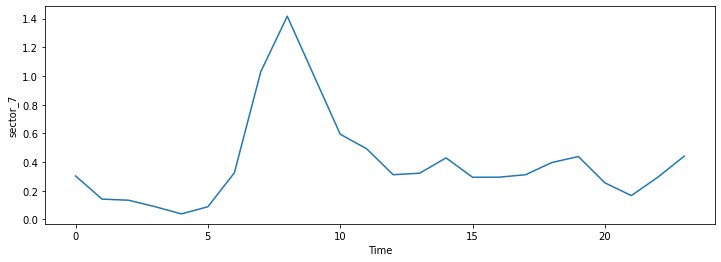

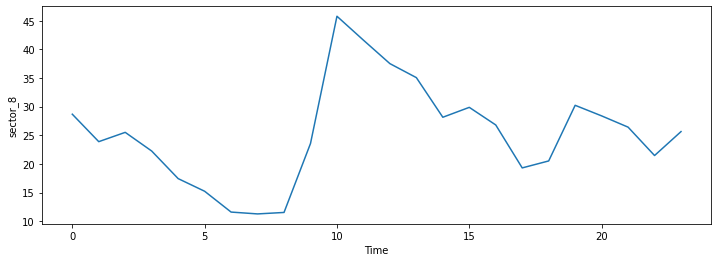

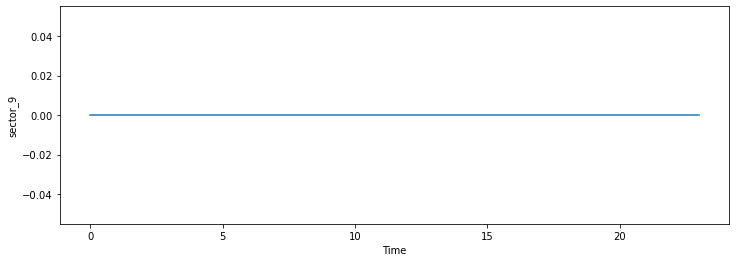

In [16]:
# [Optional] Additional plots for sectors 1-9
def plot_sectors_hourly(sector):
    plt.figure(figsize=(12,4))
    sns.lineplot(data=df_hourly[sector])
    plt.xlabel("Time")
    plt.ylabel(sector)
    plt.show()

sectors = df_hourly.columns[-9:].tolist()
for sector in sectors:
    plot_sectors_hourly(sector)

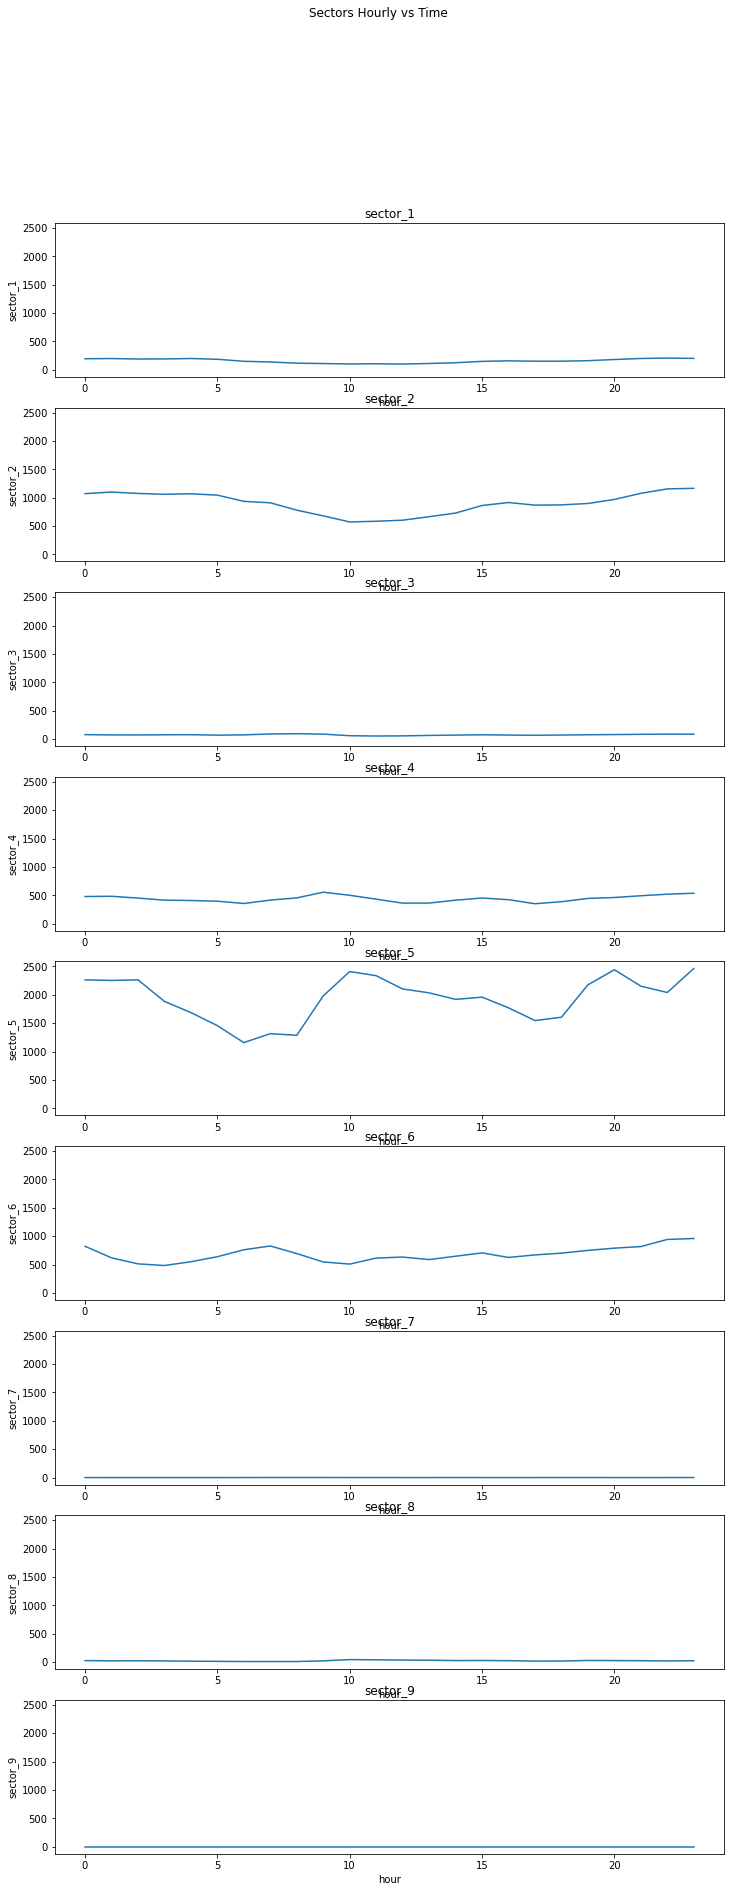

In [21]:
# [Optional] Do the same analysis for sectors 1-9
fig, axes = plt.subplots(9, 1, figsize=(12, 30), sharey=True)
fig.suptitle('Sectors Hourly vs Time')

def subplot_sectors_hourly(i, sector,):
    sns.lineplot(ax=axes[i], x=df_hourly.index, y=df_hourly[sector])
    axes[i].set_title(sector)

sectors = df_hourly.columns[-9:].tolist()
i = 0
for sector in sectors:
    subplot_sectors_hourly(i, sector)
    i += 1


In [18]:
# Step 12: Get the day of week average
df_dayofweek = df.groupby(['day_of_week']).mean()

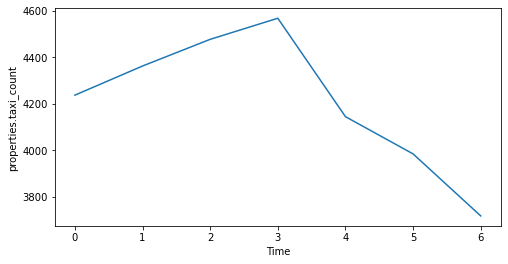

In [19]:
# Step 13: Plot day of week average for properties.taxi_count
plt.figure(figsize=(8,4))

sns.lineplot(data=df_dayofweek['properties.taxi_count'])
plt.xlabel("Time")
plt.ylabel("properties.taxi_count")

plt.show()

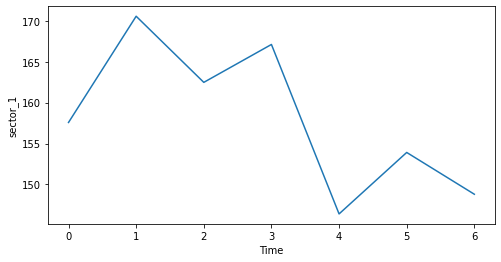

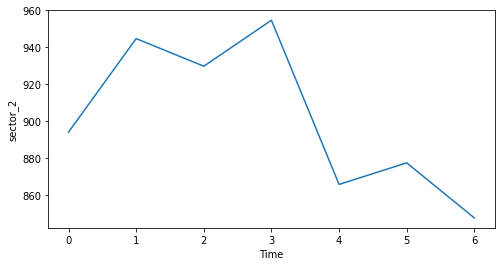

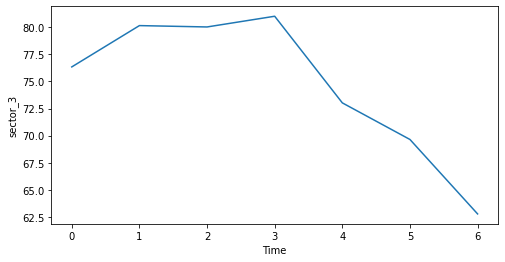

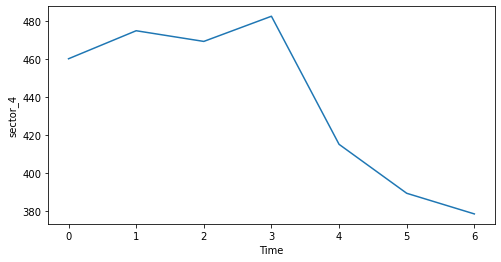

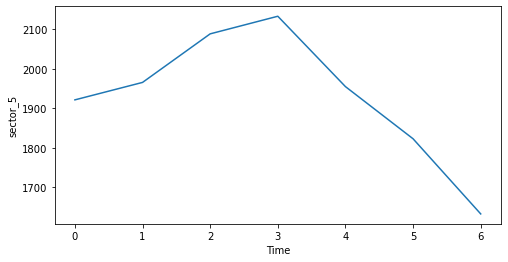

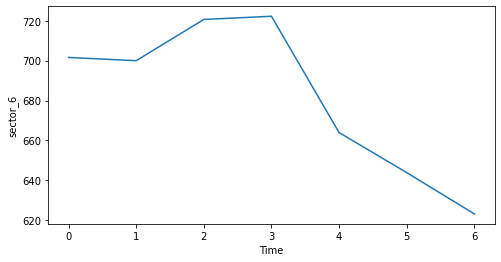

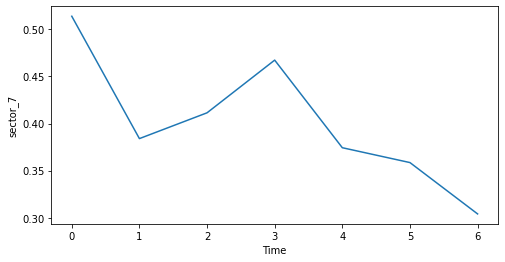

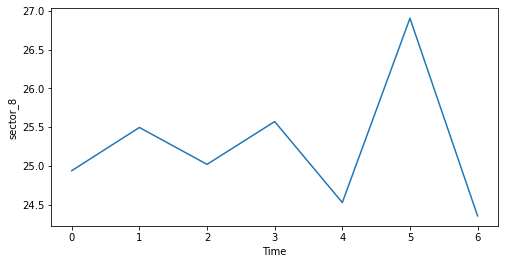

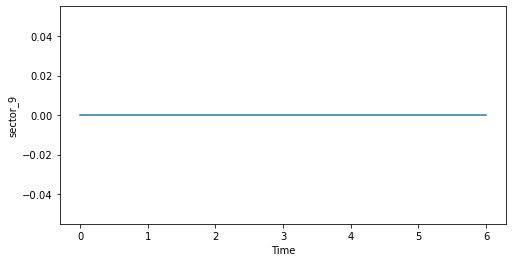

In [20]:
# [Optional]: Plot day of week average for sectors 1-9

def plot_sectors_dayofweek(sector):
    plt.figure(figsize=(8,4))
    sns.lineplot(data=df_dayofweek[sector])
    plt.xlabel("Time")
    plt.ylabel(sector)
    plt.show()

sectors = df_dayofweek.columns[-9:].tolist()
for sector in sectors:
    plot_sectors_dayofweek(sector)

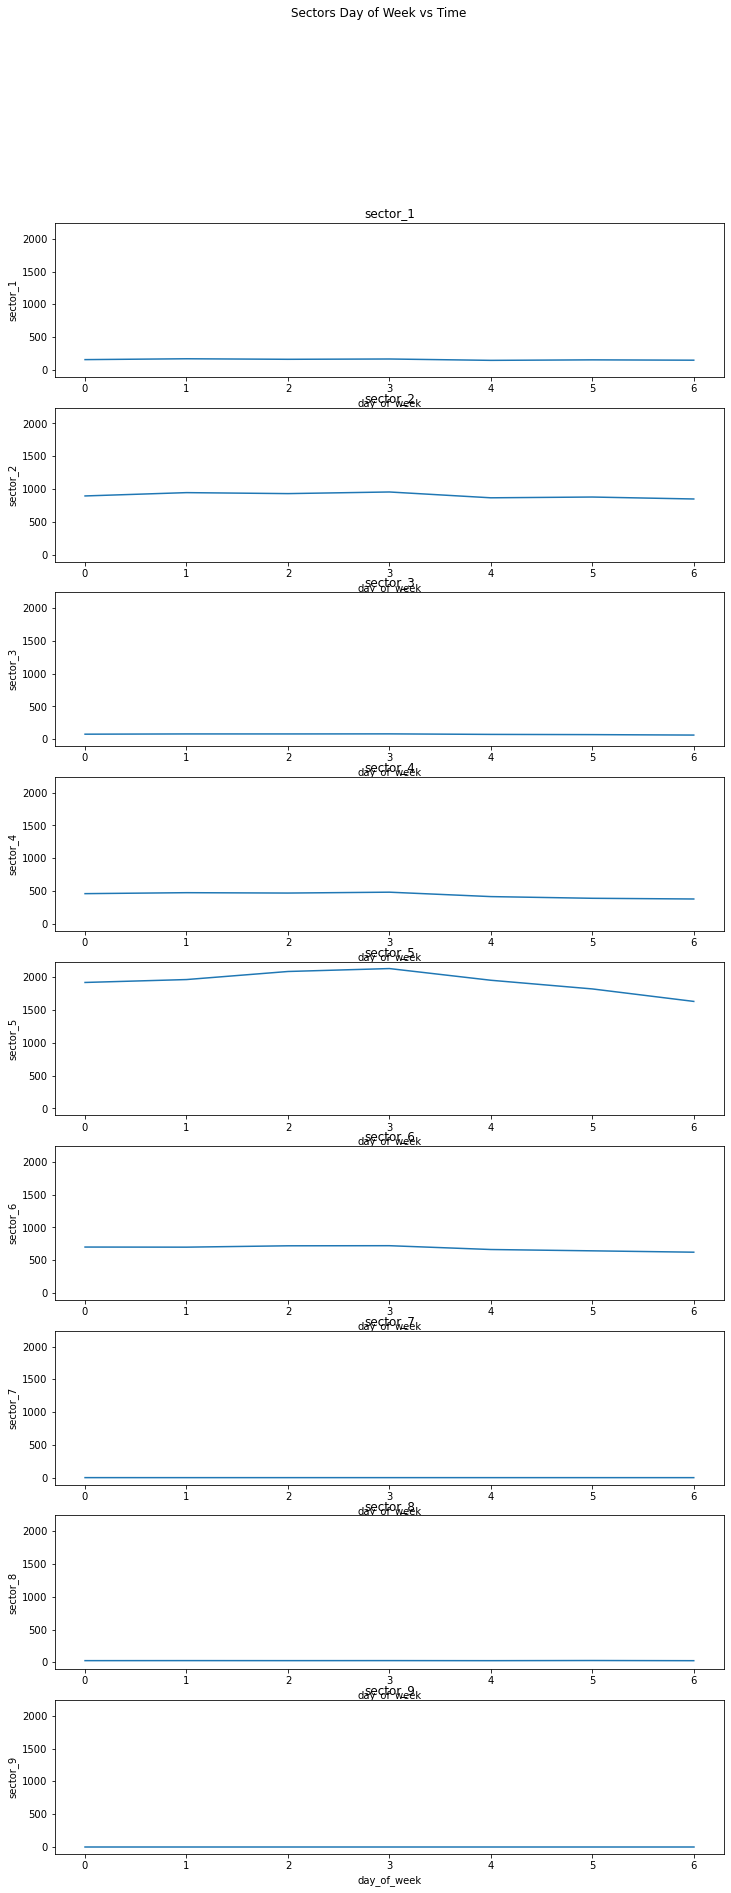

In [22]:
# [Optional] Do the same analysis for sectors 1-9
fig, axes = plt.subplots(9, 1, figsize=(12, 30), sharey=True)
fig.suptitle('Sectors Day of Week vs Time')

def subplot_sectors_dayofweek(i, sector,):
    sns.lineplot(ax=axes[i], x=df_dayofweek.index, y=df_dayofweek[sector])
    axes[i].set_title(sector)

sectors = df_dayofweek.columns[-9:].tolist()
i = 0
for sector in sectors:
    subplot_sectors_dayofweek(i, sector)
    i += 1


In [24]:
df.describe()

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
count,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.0
mean,4224.863885,2.900711,27.475819,11.500641,158.636523,904.226780,75.038341,440.482228,1936.907120,683.915045,0.401468,25.256380,0.0
std,845.310378,1.976889,17.261617,6.938569,47.415941,228.549583,18.567807,112.944154,552.850047,170.349098,0.740278,13.459721,0.0
min,58.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,8.000000,30.000000,13.000000,0.000000,0.000000,0.0
25%,3677.000000,1.000000,10.000000,5.000000,122.000000,730.000000,63.000000,376.000000,1527.000000,556.000000,0.000000,15.000000,0.0
50%,4229.000000,3.000000,25.000000,11.000000,167.000000,956.000000,75.000000,443.000000,1915.000000,670.000000,0.000000,23.000000,0.0
75%,4829.000000,5.000000,40.000000,18.000000,196.000000,1078.000000,87.000000,515.000000,2352.000000,805.000000,1.000000,34.000000,0.0
max,6716.000000,6.000000,55.000000,23.000000,271.000000,1446.000000,156.000000,833.000000,3626.000000,1198.000000,6.000000,85.000000,0.0


In [25]:
# Step 14: Remove the columns from the DataFrame
df.drop(['sector_9'], axis=1, inplace=True)

In [27]:
# Step 15: Export your cleaned DataFrame as CSV
df.to_csv("taxi3.csv", index=False)